# Loading meteorological data formats
   
A talk prepared for PyLadies 20 May 2017
   
This talk aims to discuss, demystify and crack open various data formats used by meteorological
agencies. Formats encountered along the way includes curiously formatted comma separated files, xml (blergh), json as well as n-dimensional data — all using data available online. The talk will be presented in jupyter notebooks which will be made available after the talk. The presenter, Maree Carroll, has been working at the Australian Bureau of Meteorology for the past ten years. Python is the programming language of choice for many of the staff there.

## Where to find meteorological data

* www.bom.gov.au 
* ftp://ftp.bom.gov.au/
* AWS Public datasets 
* NZ met office
* NOAA data
* UK met office
* Europe met offices
* data.gov.au
   
## Data formats used for meteorological data
   
   * Flat files
   * Excel files
   * JSON
   * XML
   * NetCDF
   * grib
   * Arc Ascii grid
   
## Flat files
   
   - each row is a unique observation or record, containing one item of information
   - each column is a feature or attribute
   - text files containing records
   - table data without structured relationships (unlike relational database tables)
   - can have a header
   - file extension can be *csv* ("comma separated values"), but not always. e.g. `.txt`
   - the field separator might not be a comma e.g. it could be a tab (tab-delimited file)
   
## Importing flat files examples
   
There are two main python modules you generally use for importing flat files: numpy, pandas
   
If all the data are numerical we can import the data with numpy
   
Numpy arrays are the python standard for storing numerical data - efficiency, work well with other packages e.g. sci-kit learn for machine learning
   
The two main funtions for loading numerical data in numpy from flat files are:
   
   * `loadtxt()` https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
   * `genfromtxt()` https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
   
Lets have a look at one file from the Bureau of Meteorology anonymous ftp server that is numerical data -- the rainfall daily grid at [ftp://ftp.bom.gov.au/anon/gen/clim_data/IDCKZRDA00.rainfall.daily.grid](ftp://ftp.bom.gov.au/anon/gen/clim_data/IDCKZRDA00.rainfall.daily.grid)

In [7]:
!curl ftp://ftp.bom.gov.au/anon/gen/clim_data/IDCKZRDA00.rainfall.daily.grid -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2401k  100 2401k    0     0   789k      0  0:00:03  0:00:03 --:--:--  789k


In [15]:
import numpy as np

filename = 'IDCKZRDA00.rainfall.daily.grid'
data = np.genfromtxt(filename, delimiter=' ', skip_header=6, skip_footer=18) 
#white space delimiter is actually default
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

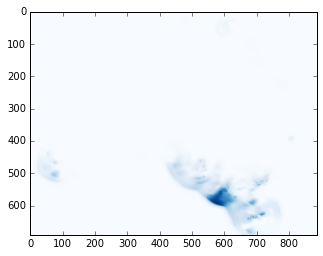

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data, cmap='Blues', interpolation='nearest')

Another useful parameter is usecols which lets you only load certain columns of the data. e.g  if you only want the first and third column you could use: `usecol=[0,2]` 

Data with mixed types (not exclusively numerical data) is best loaded into a DataFrame with pandas. 

In [16]:
import pandas as pd

A useful function for creating a DataFrame from a flat file in pandas is read_csv http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. This method can be used for any delimiter flat file.

Lets have a look at a file separated by `#`, the capital city precis forecast file at ftp://ftp.bom.gov.au/anon/gen/fwo/IDA00100.dat. Another handy thing with the most recent pandas versions is you can give it a URL as a file-like object. But let's download it with curl anyway so we can have a quick look at this small file.

In [21]:
!curl ftp://ftp.bom.gov.au/anon/gen/fwo/IDA00100.dat -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   628  100   628    0     0    949      0 --:--:-- --:--:-- --:--:--   950


In [22]:
!cat IDA00100.dat

location#state#issue_date#issue_time#product_code#forecast_date#max#forecast#
Sydney#NSW#20170515#095409#IDN10064#20170515000000#20#Shower or two. Windy.#
Melbourne#VIC#20170515#044005#IDV10450#20170515000000#17#Cloudy.#
Brisbane#QLD#20170515#020527#IDQ10095#20170515000000#26#Sunny.#
Perth#WA#20170515#035827#IDW12300#20170515000000#21#Showers.#
Adelaide#SA#20170515#044847#IDS10034#20170515000000#21#Mostly sunny.#
Hobart#TAS#20170515#031707#IDT65061#20170515000000#14#Possible light shower.#
Canberra#NSW#20170515#095409#IDN10035#20170515000000#17#Partly cloudy.#
Darwin#NT#20170515#043003#IDD10150#20170515000000#33#Sunny.#


We can notice the following about this file:
- it has a header row
- it has a mix of string an numerical data. There is also date and time in there
- We are probably not interested in all of these columns. We don't care about the product code, for example.
- the datetime is not ISO, just to be annoying, and sometimes this means you'll have to specify a date parser

In [43]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d%H%M%S')

In [72]:
data = pd.read_csv('ftp://ftp.bom.gov.au/anon/gen/fwo/IDA00100.dat', 
                   sep='#', 
                   usecols=[0,1,5,6,7], 
                   parse_dates=[2],
                   #date_parser=dateparse ## in this instance we don't need it as intelligent parser figured it out
                  )
data

,location,state,forecast_date,max,forecast
0,Sydney,NSW,2017-05-15,20,Shower or two. Windy.
1,Melbourne,VIC,2017-05-15,17,Cloudy.
2,Brisbane,QLD,2017-05-15,26,Sunny.
3,Perth,WA,2017-05-15,21,Showers.
4,Adelaide,SA,2017-05-15,21,Mostly sunny.
5,Hobart,TAS,2017-05-15,14,Possible light shower.
6,Canberra,NSW,2017-05-15,17,Partly cloudy.
7,Darwin,NT,2017-05-15,33,Sunny.


Here's another example, using fixed width columns, showing the UV forecast for various locations [ftp://ftp.bom.gov.au/anon/gen/fwo/IDZ75006.txt](ftp://ftp.bom.gov.au/anon/gen/fwo/IDZ75006.txt)

Here we can use pandas `read_fwf()` http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html?highlight=read_fwf#pandas.read_fwf

In [80]:
data = pd.read_fwf('ftp://ftp.bom.gov.au/anon/gen/fwo/IDZ75006.txt',
                   parse_dates=[4],
                   dayfirst=True,
                   header=0, #explicitly replace names
                   names=['Lat','Lon','Region','Location','Date','Start','End', 'Index','Rating'],
                   widths=[7,9,8,26,12,32,9,3,9,29,3,11],
                   usecols=[0,1,2,3,4,6,8,10,11],
                   nrows=25
                  )
data

,Lat,Lon,Region,Location,Date,Start,End,Index,Rating
0,-34.56,150.79,NSW,Albion Park,2017-05-15,11:00 am,1:00 pm,3,[Moderate]
1,-30.53,151.67,NSW,Armidale,2017-05-15,10:00 am,2:00 pm,5,[Moderate]
2,-28.84,153.56,NSW,Ballina,2017-05-15,9:40 am,2:00 pm,5,[Moderate]
3,-34.64,143.56,NSW,Balranald,2017-05-15,11:50 am,1:10 pm,3,[Moderate]
4,-30.38,150.61,NSW,Barraba,2017-05-15,10:00 am,2:00 pm,4,[Moderate]
5,-35.72,150.19,NSW,Batemans Bay,2017-05-15,11:20 am,1:00 pm,3,[Moderate]
6,-33.43,149.56,NSW,Bathurst,2017-05-15,10:50 am,1:20 pm,3,[Moderate]
7,-36.67,149.82,NSW,Bega,2017-05-15,12:00 pm,12:10 pm,3,[Moderate]
8,-34.37,150.93,NSW,Wollongong,2017-05-15,11:00 am,1:00 pm,3,[Moderate]
9,-30.04,145.95,NSW,Bourke,2017-05-15,10:20 am,2:20 pm,4,[Moderate]


In [89]:
data = pd.read_csv('ftp://ftp.bom.gov.au/anon/gen/fwo/IDZ75007.csv',
                   nrows=121,
                   parse_dates=[0],
                   usecols=[6,7])
# UV biologically effective dose clear-sky (uvbedcs)
data.index = data.pop('LOCAL date')
data

,uvbedcs
LOCAL date,
2017-05-14 22:00:00,0.000000
2017-05-14 23:00:00,0.000000
2017-05-15 00:00:00,0.000000
2017-05-15 01:00:00,0.000000
2017-05-15 02:00:00,0.000000
2017-05-15 03:00:00,0.000000
2017-05-15 04:00:00,0.000000
2017-05-15 05:00:00,0.000000
2017-05-15 06:00:00,0.000000


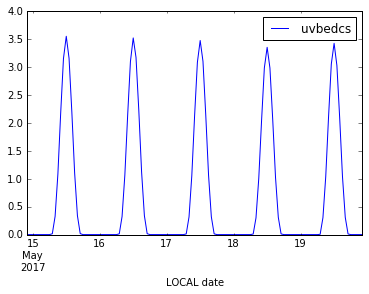

In [90]:
data.plot()

A daily rainfall file from http://www.bom.gov.au/climate/data/

In [117]:
!head -10 IDCJAC0009_086338_1800_Data.csv

In [125]:
pd.read_csv('IDCJAC0009_086338_1800_Data.csv',usecols=[2,3,4,5,6],parse_dates=[[0,1,2]])

,Year_Month_Day,Rainfall amount (millimetres),Period over which rainfall was measured (days)
0,2013-01-01,NaN,NaN
1,2013-01-02,NaN,NaN
2,2013-01-03,NaN,NaN
3,2013-01-04,NaN,NaN
4,2013-01-05,NaN,NaN
5,2013-01-06,NaN,NaN
6,2013-01-07,NaN,NaN
7,2013-01-08,NaN,NaN
8,2013-01-09,NaN,NaN
9,2013-01-10,NaN,NaN


## JSON
 
Example, the last 72 hours of observations for Melbourne via http://www.bom.gov.au/products/IDV60901/IDV60901.95936.shtml link to http://www.bom.gov.au/fwo/IDV60901/IDV60901.95936.json

In [101]:
!curl http://www.bom.gov.au/fwo/IDV60901/IDV60901.95936.json -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125k    0  125k    0     0   193k      0 --:--:-- --:--:-- --:--:--  193k


In [112]:
import json
from pprint import pprint

with open('IDV60901.95936.json') as fp:
    data = json.load(fp)
    pprint(data['observations']['data'])
    

[{'aifstime_utc': '20170515053000',
  'air_temp': 14.7,
  'apparent_t': 13.7,
  'cloud': '-',
  'cloud_base_m': None,
  'cloud_oktas': None,
  'cloud_type': '-',
  'cloud_type_id': None,
  'delta_t': 2.0,
  'dewpt': 10.9,
  'gust_kmh': 9,
  'gust_kt': 5,
  'history_product': 'IDV60901',
  'lat': -37.8,
  'local_date_time': '15/03:30pm',
  'local_date_time_full': '20170515153000',
  'lon': 145.0,
  'name': 'Melbourne (Olympic Park)',
  'press': 1018.9,
  'press_msl': 1018.9,
  'press_qnh': 1018.9,
  'press_tend': '-',
  'rain_trace': '0.0',
  'rel_hum': 78,
  'sea_state': '-',
  'sort_order': 0,
  'swell_dir_worded': '-',
  'swell_height': None,
  'swell_period': None,
  'vis_km': '10',
  'weather': '-',
  'wind_dir': 'S',
  'wind_spd_kmh': 7,
  'wind_spd_kt': 4,
  'wmo': 95936},
 {'aifstime_utc': '20170515050000',
  'air_temp': 15.4,
  'apparent_t': 14.0,
  'cloud': '-',
  'cloud_base_m': None,
  'cloud_oktas': None,
  'cloud_type': '-',
  'cloud_type_id': None,
  'delta_t': 2.4,
  'de

In [111]:
data = pd.DataFrame(data['observations']['data'])
data

,aifstime_utc,air_temp,apparent_t,cloud,cloud_base_m,cloud_oktas,cloud_type,cloud_type_id,delta_t,dewpt,...,sort_order,swell_dir_worded,swell_height,swell_period,vis_km,weather,wind_dir,wind_spd_kmh,wind_spd_kt,wmo
0,20170515053000,14.7,13.7,-,None,None,-,None,2.0,10.9,...,0,-,None,None,10,-,S,7,4,95936
1,20170515050000,15.4,14.0,-,None,None,-,None,2.4,10.8,...,1,-,None,None,10,-,S,9,5,95936
2,20170515043000,16.7,16.7,-,None,None,-,None,3.1,11.0,...,2,-,None,None,10,-,NNW,2,1,95936
3,20170515040000,15.4,14.9,-,None,None,-,None,2.5,10.6,...,3,-,None,None,10,-,NNW,4,2,95936
4,20170515033000,14.5,14.3,-,None,None,-,None,2.1,10.5,...,4,-,None,None,10,-,NNE,2,1,95936
5,20170515030000,13.4,12.8,-,None,None,-,None,1.6,10.4,...,5,-,None,None,10,-,W,4,2,95936
6,20170515023000,13.0,12.7,-,None,None,-,None,1.4,10.2,...,6,-,None,None,10,-,NNE,2,1,95936
7,20170515020000,12.2,11.2,-,None,None,-,None,1.0,10.3,...,7,-,None,None,10,-,NNE,6,3,95936
8,20170515013000,11.3,11.1,-,None,None,-,None,0.5,10.4,...,8,-,None,None,10,-,SE,2,1,95936
9,20170515010000,10.7,10.6,-,None,None,-,None,0.0,10.7,...,9,-,None,None,10,-,NE,2,1,95936


 
   
 ## XML
 
 Example of XML available from BoM:  Forecasts for Melbourne area http://www.bom.gov.au/fwo/IDV10450.xml

In [58]:
!curl http://www.bom.gov.au/fwo/IDV10450.xml -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13031  100 13031    0     0  23629      0 --:--:-- --:--:-- --:--:-- 23606


In [ ]:
# You may need to install libxml first. If on a mac with homebrew, uncomment and run the following
#!brew install libxml2
#!brew install libxslt
#!brew link libxml2 --force
#!brew link libxslt --force

In [62]:
import xml.etree.ElementTree as ET
from lxml import etree
import pandas as pd

In [92]:
xml_data = 'IDV10450.xml'

tree = ET.parse(xml_data) 
root = tree.getroot() 
fcs = [] #forecasts data to turn into a dataframe
for forecast in root.iter('forecast'):
    for area in forecast.iter('area'):
        if area.attrib['type'] == 'region': continue
        #print ("Processing", area.attrib['description'])
        for period in area.iter('forecast-period'):
            fc = {}
            fc['type'] = area.attrib['type']
            fc['location'] = area.attrib['description']
            for attr in period.attrib:
                fc[attr] = period.attrib[attr]
            for text in period.iter('text'):
                fc[text.attrib['type']] = text.text
            fcs.append(fc)
data = pd.DataFrame(fcs)
data
 

,end-time-local,end-time-utc,forecast,index,location,precis,probability_of_precipitation,start-time-local,start-time-utc,type,uv_alert
0,2017-05-16T00:00:00+10:00,2017-05-15T14:00:00Z,Partly cloudy. Areas of morning fog. Slight (2...,0,Melbourne,NaN,NaN,2017-05-15T00:00:00+10:00,2017-05-14T14:00:00Z,metropolitan,"Sun protection not recommended, UV Index predi..."
1,2017-05-17T00:00:00+10:00,2017-05-16T14:00:00Z,Partly cloudy. Areas of fog in the morning. Li...,1,Melbourne,NaN,NaN,2017-05-16T00:00:00+10:00,2017-05-15T14:00:00Z,metropolitan,NaN
2,2017-05-18T00:00:00+10:00,2017-05-17T14:00:00Z,Areas of morning fog. Cloudy. Slight (30%) cha...,2,Melbourne,NaN,NaN,2017-05-17T00:00:00+10:00,2017-05-16T14:00:00Z,metropolitan,NaN
3,2017-05-19T00:00:00+10:00,2017-05-18T14:00:00Z,Areas of morning fog. Partly cloudy. Light win...,3,Melbourne,NaN,NaN,2017-05-18T00:00:00+10:00,2017-05-17T14:00:00Z,metropolitan,NaN
4,2017-05-20T00:00:00+10:00,2017-05-19T14:00:00Z,Areas of morning fog. Cloudy. Medium (60%) cha...,4,Melbourne,NaN,NaN,2017-05-19T00:00:00+10:00,2017-05-18T14:00:00Z,metropolitan,NaN
5,2017-05-21T00:00:00+10:00,2017-05-20T14:00:00Z,Cloudy. High (80%) chance of rain. Winds easte...,5,Melbourne,NaN,NaN,2017-05-20T00:00:00+10:00,2017-05-19T14:00:00Z,metropolitan,NaN
6,2017-05-22T00:00:00+10:00,2017-05-21T14:00:00Z,Partly cloudy. Slight (30%) chance of a shower...,6,Melbourne,NaN,NaN,2017-05-21T00:00:00+10:00,2017-05-20T14:00:00Z,metropolitan,NaN
7,2017-05-16T00:00:00+10:00,2017-05-15T14:00:00Z,NaN,0,Melbourne,Cloudy.,10%,2017-05-15T05:00:00+10:00,2017-05-14T19:00:00Z,location,NaN
8,2017-05-17T00:00:00+10:00,2017-05-16T14:00:00Z,NaN,1,Melbourne,Partly cloudy.,5%,2017-05-16T00:00:00+10:00,2017-05-15T14:00:00Z,location,NaN
9,2017-05-18T00:00:00+10:00,2017-05-17T14:00:00Z,NaN,2,Melbourne,Possible shower.,30%,2017-05-17T00:00:00+10:00,2017-05-16T14:00:00Z,location,NaN


 There is also data like weather observations for the past 72 hours in XML format e.g. ftp://ftp.bom.gov.au/anon/gen/fwo/IDD65176.xml
   
 ## NetCDF
   
 e.g ftp://ftp.bom.gov.au/anon/gen/nwp/IDY00044.nc

In [93]:
#!conda install netCDF4 -y
!curl ftp://ftp.bom.gov.au/anon/gen/nwp/IDY00044.nc -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  766k  100  766k    0     0   211k      0  0:00:03  0:00:03 --:--:--  211k


In [94]:
from netCDF4 import Dataset
rootgrp = Dataset("IDY00044.nc", "r", format="NETCDF4")

In [97]:
rootgrp

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    title: Analysed global low resolution blended 1m sea surface temperature
    DSD_entry_id: ABOM-L4LR1m-GLOB-v01
    references: \nhttp://www.bom.gov.au/bmrc/ocean/BLUElink/SST/The_Bureau_of_Meteorology_SST_analysis_system.doc\nhttp://www.bom.gov.au/bmrc/ocean/BLUElink/SST/BLUElink_L4_file_format_v4.pdf
    GDS_data_centre: ABOM
    institution: Australian Bureau of Meteorology
    contact: G.Warren@bom.gov.au
    GDS_version_id: v1.0-rev1.7
    netcdf_version_id: 4.1.3 of Aug 10 2011 04:46:23 $
    creation_date: 2017-05-15
    product_version: fv01
    history: 2017/05/15 00:23:26 -00 : uarch2ghrsst.x /rtop/data/ocean//sstanal//SSTanal.14May2017
    spatial_resolution: 1.0 degree
    start_date: 2017-05-08
    start_time: 00:00:00 UTC
    stop_date: 2017-05-15
    stop_time: 00:00:00 UTC
    southernmost_latitude: -89.5
    northernmost_latitude: 89.5
    wester

However, as I prefer a more pandas-like API into netcdf files (as well as other n-dimenional files), I use xarray whenever I can. 

In [98]:
import xarray as xr

In [9]:
data = xr.open_dataset('CT2007B.molefrac.nc')
data

<xarray.Dataset>
Dimensions:   (lat: 45, level: 25, lon: 60, time: 1796)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01T12:00:00 2000-01-02T12:00:00 ...
  * lat       (lat) float64 -88.0 -84.0 -80.0 -76.0 -72.0 -68.0 -64.0 -60.0 ...
  * level     (level) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * lon       (lon) float64 -177.0 -171.0 -165.0 -159.0 -153.0 -147.0 -141.0 ...
Data variables:
    pressure  (time, level, lat, lon) float64 6.923e+04 6.926e+04 6.93e+04 ...
    co2       (time, level, lat, lon) float64 366.4 366.4 366.4 366.4 366.4 ...
Attributes:
    source: CarbonTracker release CT2007B
    history: Mon Mar 15 11:53:20 2010: ncatted -O -a units,time,o,c,days since 2000-01-01 00:00:00 CT2007B.molefrac.nc
Tue Jun 10 10:08:27 2008: /usr/bin/ncrcat -H -O ./ct07b2i_molefrac_glb6x4_2000_co2.nc
Created on Tue Jun 10 2008 10:05:21 PDT
by script 'Time-stamp: <mistral.cmdl.noaa.gov:/Users/andy/Projects/model/LAS/make_psd_sample.sh - 10 Jun 2008 (Tue) 10:

In [22]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
# New york lat lon 40.7128° N, 74.0059° W
co21d = data.isel(lat=0, lon=0,level=0)
## see http://xarray.pydata.org/en/stable/generated/xarray.Dataset.sel.html#xarray.Dataset.sel
co21d = data.sel(lat=-40., lon=-74,level=1, method='nearest')
co21d['co2']

<xarray.DataArray 'co2' (time: 1796)>
array([ 364.61859131,  363.92672729,  365.13171387, ...,  376.46270752,
        376.28167725,  375.97399902])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 2000-01-02T12:00:00 ...
    lat      float64 -40.0
    level    int32 1
    lon      float64 -75.0
Attributes:
    long_name: mole_fraction_of_carbon_dioxide_in_air
    actual_range: [ 357.24996948  473.51940918]
    valid_range: [ 357.24996948  473.51940918]
    statistic: Analyzed Mean
    var_desc: CarbonTracker CO2 mole fraction
    parent_stat: Individual Obs
    dataset: CarbonTracker CT2007B release
    level_desc: Multiple levels
    units: micromol mol-1

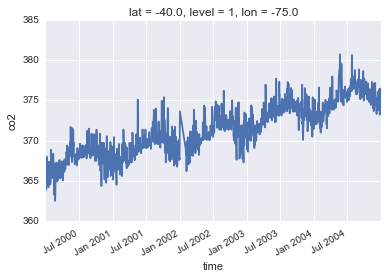

In [25]:
co21d['co2'].plot()

Another module worth looking into if you are loading netcdf files is iris from the UK met office.

In [95]:
import iris

   
 ## grib
 
 GRIB is the World Meteorological Organization (WMO) standard file format for the exchange of weather data. More information about this format can be found at https://en.wikipedia.org/wiki/GRIB
 
netCDF is easier to deal with, but most operational forecast centers provide data in GRIB format. GRIB is a record format, where every record is a 2D field. In this example we use pygrib to read some ECMWF ensemble forecast data, then use matplotlib and Basemap plot forecast maps. Pygrib uses the ECMWF GRIB_API C library under the hood.

ftp://ftp.cdc.noaa.gov/pub/Datasets/CarbonTracker/

Acknowledgement: CarbonTracker results provided by NOAA/ESRL
Boulder, Colorado, USA, http://carbontracker.noaa.gov.

http://www.bom.gov.au/nwp/doc/access/NWPData.shtml

Example grib file ftp://ftp.bom.gov.au/anon/sample/adfd/IDV71000_VIC_T_SFC.grb

In [28]:
!curl ftp://ftp.bom.gov.au/anon/sample/adfd/IDV71000_VIC_T_SFC.grb -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.2M  100 10.2M    0     0   634k      0  0:00:16  0:00:16 --:--:--  829k


In [104]:
#!conda install -c anaconda basemap=1.0.7 -y
#!conda update jpeg -y; conda update jasper -y
#!conda install -c conda-forge pygrib=2.0.2 "libgdal<2.0"

In [27]:
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
import pygrib # import pygrib interface to grib_api

In [29]:
grbs = pygrib.open('IDV71000_VIC_T_SFC.grb')

In [57]:
for grb in grbs[:10]: 
    print(grb)
#print(grbs[1].keys())

1:Temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201203281800
2:Temperature:K (instant):regular_ll:surface:level 0:fcst time 1 hrs:from 201203281800
3:Temperature:K (instant):regular_ll:surface:level 0:fcst time 2 hrs:from 201203281800
4:Temperature:K (instant):regular_ll:surface:level 0:fcst time 3 hrs:from 201203281800
5:Temperature:K (instant):regular_ll:surface:level 0:fcst time 4 hrs:from 201203281800
6:Temperature:K (instant):regular_ll:surface:level 0:fcst time 5 hrs:from 201203281800
7:Temperature:K (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 201203281800
8:Temperature:K (instant):regular_ll:surface:level 0:fcst time 7 hrs:from 201203281800
9:Temperature:K (instant):regular_ll:surface:level 0:fcst time 8 hrs:from 201203281800
10:Temperature:K (instant):regular_ll:surface:level 0:fcst time 9 hrs:from 201203281800


In [53]:
grbs.rewind() # rewind the iterator
t2mens = []
for grb in grbs:
    t2mens.append(grb.values)
t2mens = np.array(t2mens)
print (t2mens.shape, t2mens.min(), t2mens.max())
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print ('min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max())

(169, 292, 341) 275.56 9999.0
min/max lat and lon -39.76 -33.94 140.902896 151.039184


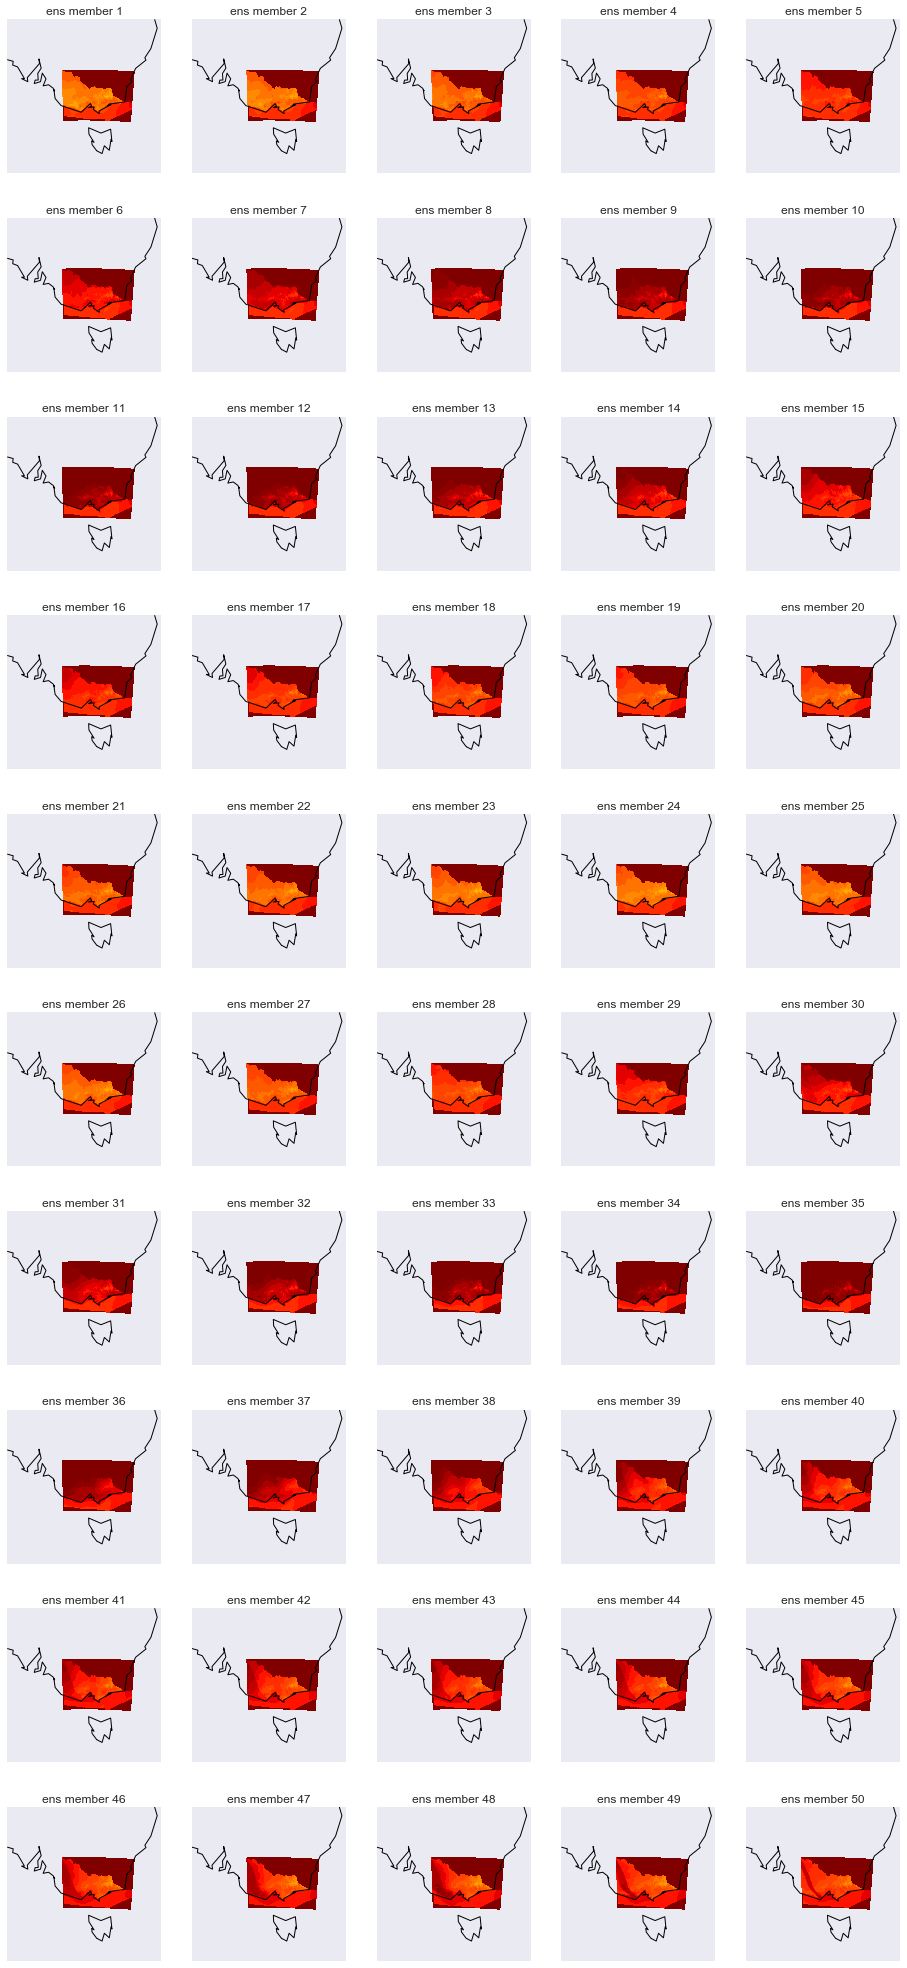

In [56]:
## plot centred on Melbourne 37.8136° S, 144.9631° E
fig = plt.figure(figsize=(16,35))
m = Basemap(projection='lcc',lon_0=144,lat_0=-37,width=2.e6,height=2.e6)
x,y = m(lons,lats)
for nens in range(1,51):
    ax = plt.subplot(10,5,nens)
    m.drawcoastlines()
    cs = m.contourf(x,y,t2mens[nens],np.linspace(230,300,41),cmap=plt.cm.jet,extend='both')
    t = plt.title('ens member %s' % nens)

   
## Arc Ascii grid

A good summary about this data format can be found at https://en.wikipedia.org/wiki/Esri_grid

This data format is available from BoM, for example, from the average rainfall conditions map http://www.bom.gov.au/jsp/awap/rain/index.jsp you can download the grid.

You can load this into numpy with `genfromtxt()`

In [115]:
import numpy as np
data = np.genfromtxt('latest.grid.txt',skip_header=6, skip_footer=18)
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

It's important to note that the origin (0,0) of this file is actually the bottom left corner, so you can use the numpy `flip` methods to allow indexing from the top left if that is where you are basing your indexing.

More references:

* https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* ftp://ftp.cdc.noaa.gov/pub/Datasets
* http://apps.ecmwf.int/datasets/data/tigge/levtype=sfc/type=cf/
* ftp://ftp.bom.gov.au/anon/sample/adfd/